In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph
from rdflib.namespace import RDF, Namespace
import os

In [2]:
os.getcwd()

'/Users/stephanehess/Documents/linked_data/project'

In [3]:
os.listdir()

['extract_tables_from_graph.ipynb',
 'Untitled1.ipynb',
 '.DS_Store',
 'requirements.txt',
 'amend_graph.ipynb',
 'Untitled.ipynb',
 'query_graph.ipynb',
 'first_attempt.ipynb',
 '.ipynb_checkpoints',
 'data']

In [4]:
os.chdir('/Users/stephanehess/Documents/linked_data/project/data')

In [5]:
g = Graph()
g.parse("public_dataset.ttl", format="turtle")

<Graph identifier=N83d34a5a123d4ddb8ef2a2bc53710d37 (<class 'rdflib.graph.Graph'>)>

In [6]:
for subj, pred, obj in g:
    print('\n')
    print(subj)
    print(pred)
    print(obj)



http://dbpedia.org/resource/Jürg_Jenatsch
schema:deathPlace
http://dbpedia.org/resource/Chur


http://portacultura.gr.ch/records/RMC-125486
schema:creator
Bong 17 R.


http://portacultura.gr.ch/records/RMC-125486
schema:name
Die Ermordung des Georg (Jörg, Jürg) Jenatsch


http://dbpedia.org/resource/Jürg_Jenatsch
rdf:type
http://schema.org/Person


http://portacultura.gr.ch/records/RMC-125486
schema:about
http://dbpedia.org/resource/Jürg_Jenatsch


http://portacultura.gr.ch/records/RMC-125486
rdf:type
http://schema.org/CreativeWork


http://dbpedia.org/resource/Jürg_Jenatsch
schema:deathDate
1639-01-24


http://portacultura.gr.ch/records/RMC-125486
schema:material
Holzstich auf Papier


http://dbpedia.org/resource/Jürg_Jenatsch
schema:relatedTo
Bündner Wirren


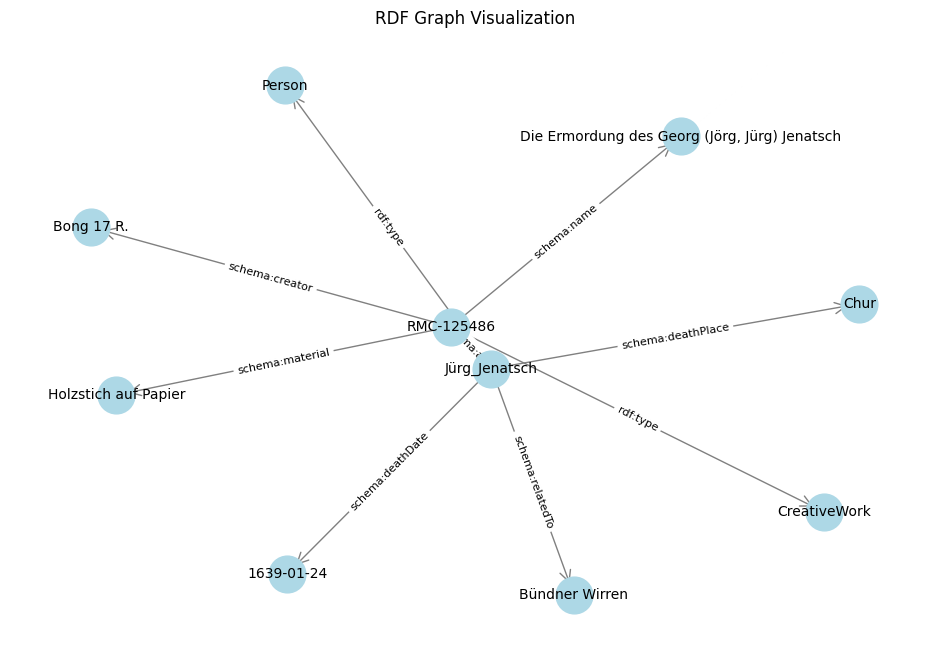

In [7]:


# Define namespaces
SCHEMA = Namespace("http://schema.org/")

# Load RDF graph from file
g = Graph()
g.parse("public_dataset.ttl", format="turtle")

# Create a directed graph using networkx
nx_graph = nx.DiGraph()

# Populate the networkx graph with RDF triples
for subj, pred, obj in g:
    nx_graph.add_edge(subj, obj, label=pred)

# Plot the RDF graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(nx_graph, k=0.5, seed=42)  # Layout for better visualization

# Draw the nodes
nx.draw_networkx_nodes(nx_graph, pos, node_size=700, node_color='lightblue')

# Draw the edges
nx.draw_networkx_edges(nx_graph, pos, arrowstyle="->", arrowsize=20, edge_color='gray')

# Draw the labels
node_labels = {node: node.split("/")[-1] for node in nx_graph.nodes()}
nx.draw_networkx_labels(nx_graph, pos, labels=node_labels, font_size=10)

edge_labels = {(u, v): data['label'].split("/")[-1] for u, v, data in nx_graph.edges(data=True)}
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels, font_size=8)

# Display the graph
plt.title("RDF Graph Visualization")
plt.axis('off')
plt.show()



In [8]:
# Extract and print one relationship from the RDF graph
for subj, pred, obj in g.triples((None, SCHEMA.creator, None)):
    print(f"The creative work '{subj.split('/')[-1]}' was created by '{obj.split('/')[-1]}'.")
    break

In [9]:
type(g)

rdflib.graph.Graph

In [10]:
for subj, pred, obj in g:
    print('\n')
    print(subj)
    print(pred)
    print(obj)



http://dbpedia.org/resource/Jürg_Jenatsch
schema:deathPlace
http://dbpedia.org/resource/Chur


http://portacultura.gr.ch/records/RMC-125486
schema:creator
Bong 17 R.


http://portacultura.gr.ch/records/RMC-125486
schema:name
Die Ermordung des Georg (Jörg, Jürg) Jenatsch


http://dbpedia.org/resource/Jürg_Jenatsch
rdf:type
http://schema.org/Person


http://portacultura.gr.ch/records/RMC-125486
schema:about
http://dbpedia.org/resource/Jürg_Jenatsch


http://portacultura.gr.ch/records/RMC-125486
rdf:type
http://schema.org/CreativeWork


http://dbpedia.org/resource/Jürg_Jenatsch
schema:deathDate
1639-01-24


http://portacultura.gr.ch/records/RMC-125486
schema:material
Holzstich auf Papier


http://dbpedia.org/resource/Jürg_Jenatsch
schema:relatedTo
Bündner Wirren
